# **Introduction to Smart Grid Technology and Grid Stability Analysis**

The integration of renewable energy sources into modern electrical grids marks a revolutionary shift in the global energy landscape. Unlike traditional fossil fuel-based systems, renewable energy provides a sustainable and eco-friendly solution to the ever-growing energy demands of modern societies. However, this transition is not without challenges. 

A critical aspect of smart grid technology is maintaining stability in a system characterized by fluctuating energy generation and consumption patterns. Grid frequency, a fundamental metric in alternating current (AC) systems, plays a pivotal role in monitoring this stability. Deviations in frequency signify imbalances between energy supply and demand, which must be addressed to prevent disruptions. This dynamic management of supply-demand equilibrium, influenced by economic parameters like energy pricing, forms the cornerstone of smart grid systems.

In [1]:
import numpy as np
import pandas as pd

![download.jpg](attachment:63d7c9a8-6449-4615-a251-9d79ffea8c9f.jpg)

In [2]:
df = pd.read_csv('smart_grid_stability_augmented.csv')

In [3]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0.023892,unstable
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,-0.025803,stable
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,-0.031810,stable
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0.037789,unstable


In [4]:
# General Data Overview
print("Shape of the dataset:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Unique values in categorical variables
if 'stabf' in df.columns:
    print("\nValue Counts for 'stabf':")
    print(df['stabf'].value_counts())


Shape of the dataset: (60000, 14)

Data Types:
tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

Missing Values:
tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

Summary Statistics:
               tau1          tau2          tau3          tau4            p1  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       5.250000      5.250001      5.250001      5.250001      3.750000   
std        2.742434      2.742437      2.742437      2.742437      0.752129   
min        0.500793      0.500141      0.500141      0.500141      1.582590   
25%        2.874892      2.875011      2.875011      2.875011      3.218300   
50%        5.250004   

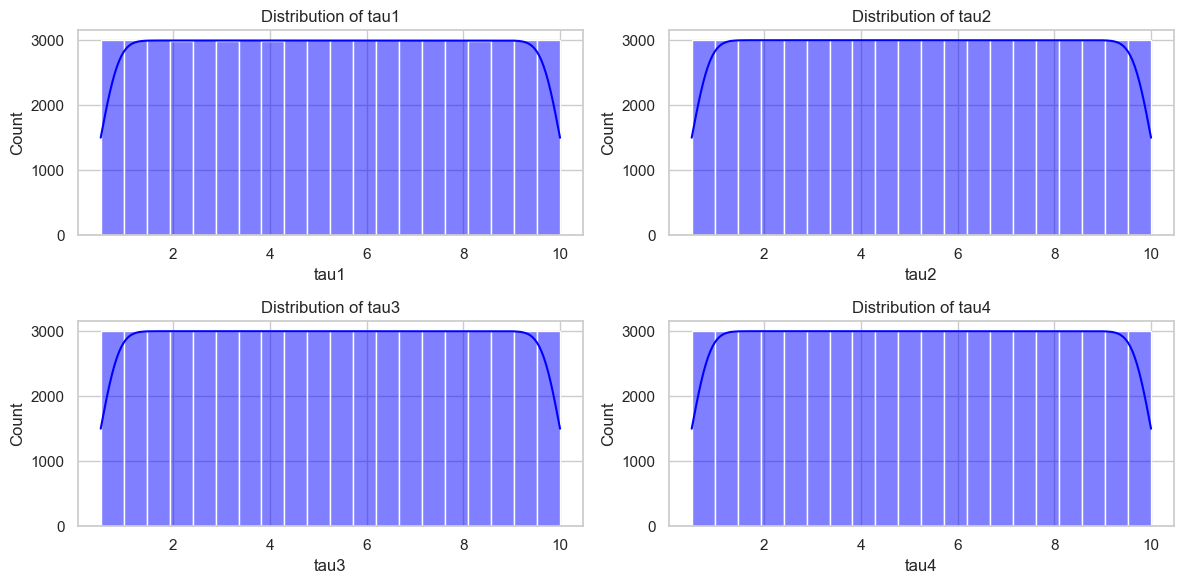

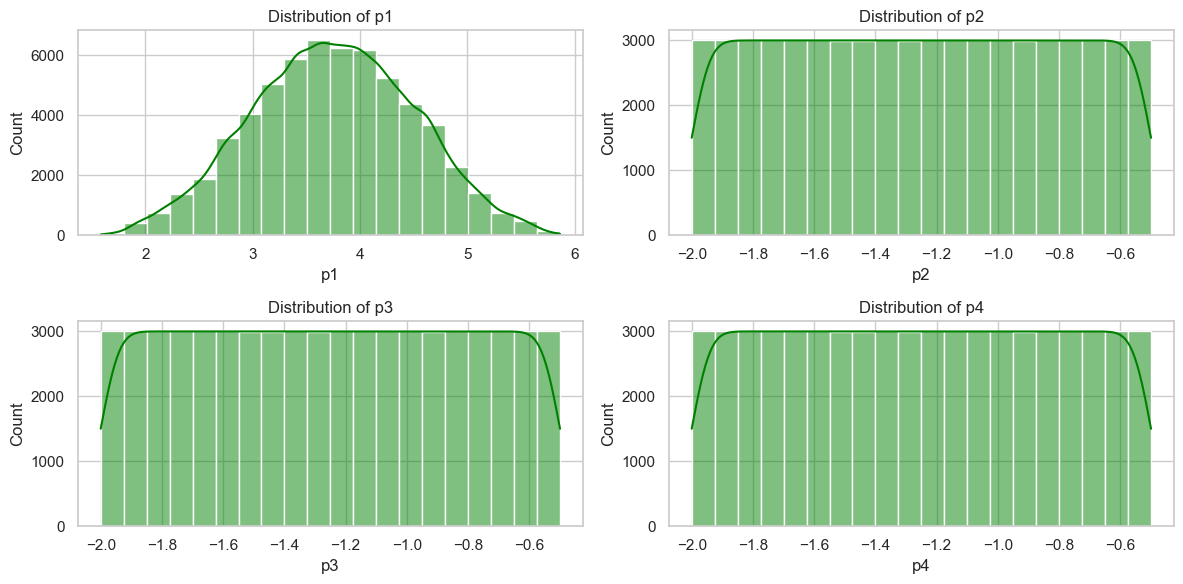

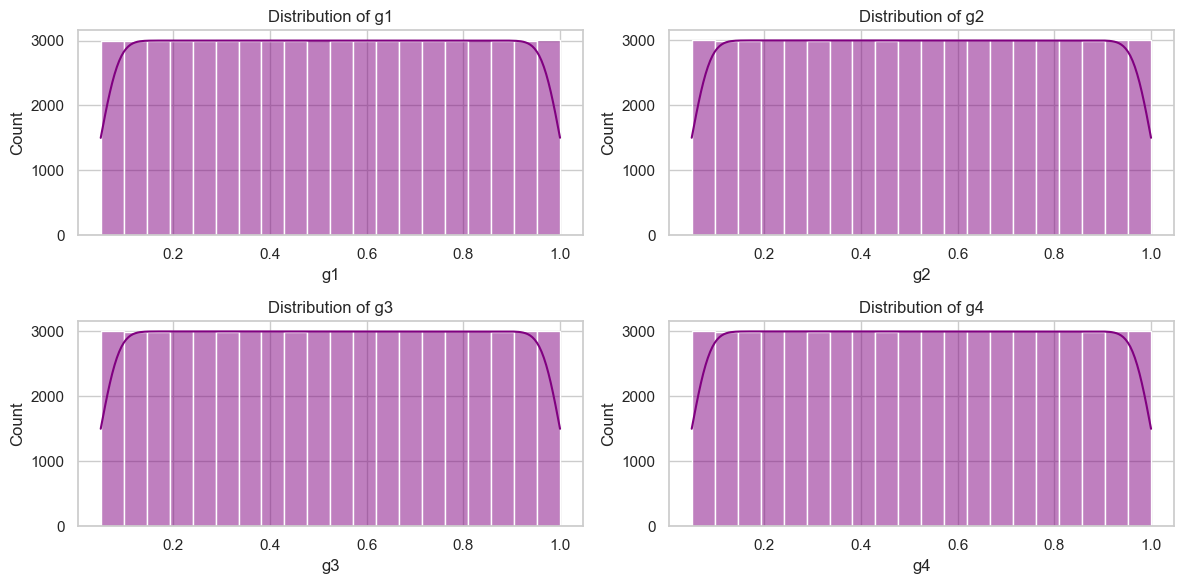

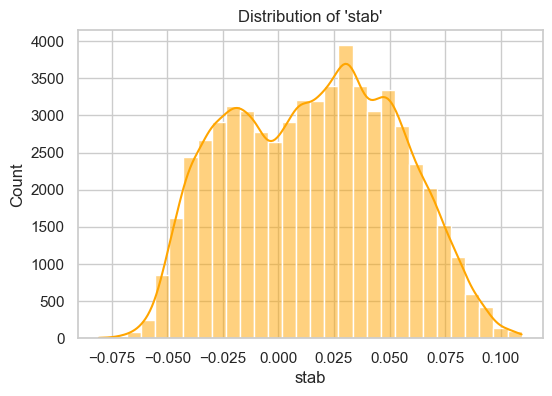

C:\Users\johnn\AppData\Local\Temp\ipykernel_23948\3163402836.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stabf', data=df, palette='Set2')


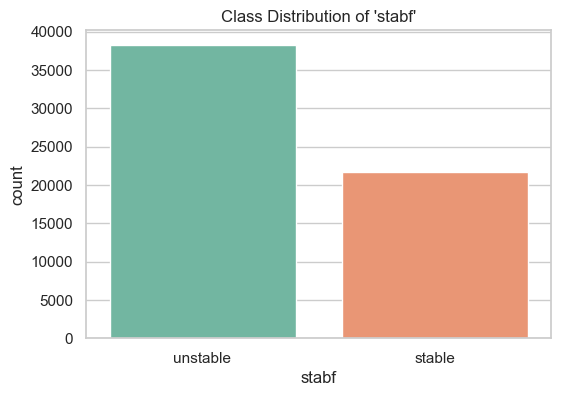

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for plots
sns.set(style="whitegrid")

# List of feature groups
tau_features = ['tau1', 'tau2', 'tau3', 'tau4']
p_features = ['p1', 'p2', 'p3', 'p4']
g_features = ['g1', 'g2', 'g3', 'g4']

# 1. Distribution of 'tau' features
plt.figure(figsize=(12, 6))
for i, col in enumerate(tau_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# 2. Distribution of 'p' features
plt.figure(figsize=(12, 6))
for i, col in enumerate(p_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20, color='green')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# 3. Distribution of 'g' features
plt.figure(figsize=(12, 6))
for i, col in enumerate(g_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20, color='purple')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# 4. Target Variable: 'stab'
plt.figure(figsize=(6, 4))
sns.histplot(df['stab'], kde=True, bins=30, color='orange')
plt.title("Distribution of 'stab'")
plt.show()

# 5. Target Variable: 'stabf'
plt.figure(figsize=(6, 4))
sns.countplot(x='stabf', data=df, palette='Set2')
plt.title("Class Distribution of 'stabf'")
plt.show()


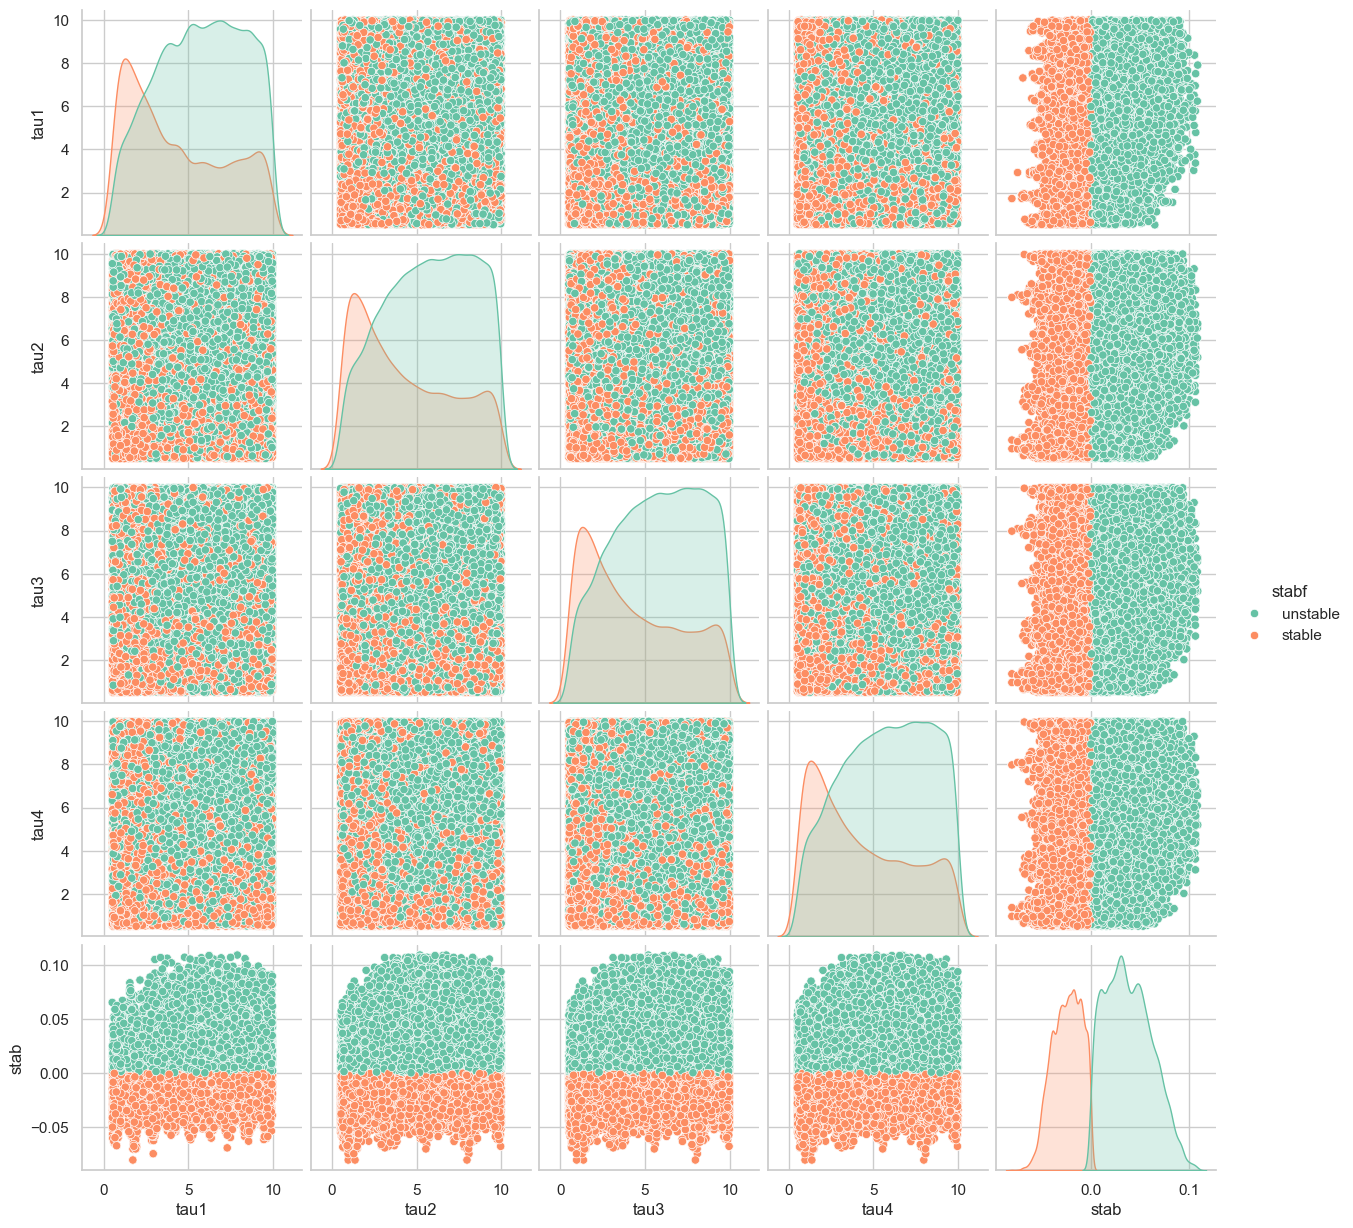

In [6]:
# Pairplot for 'stab' and numerical features
sns.pairplot(df, vars=['tau1', 'tau2', 'tau3', 'tau4', 'stab'], diag_kind='kde', hue='stabf', palette='Set2')
plt.show()


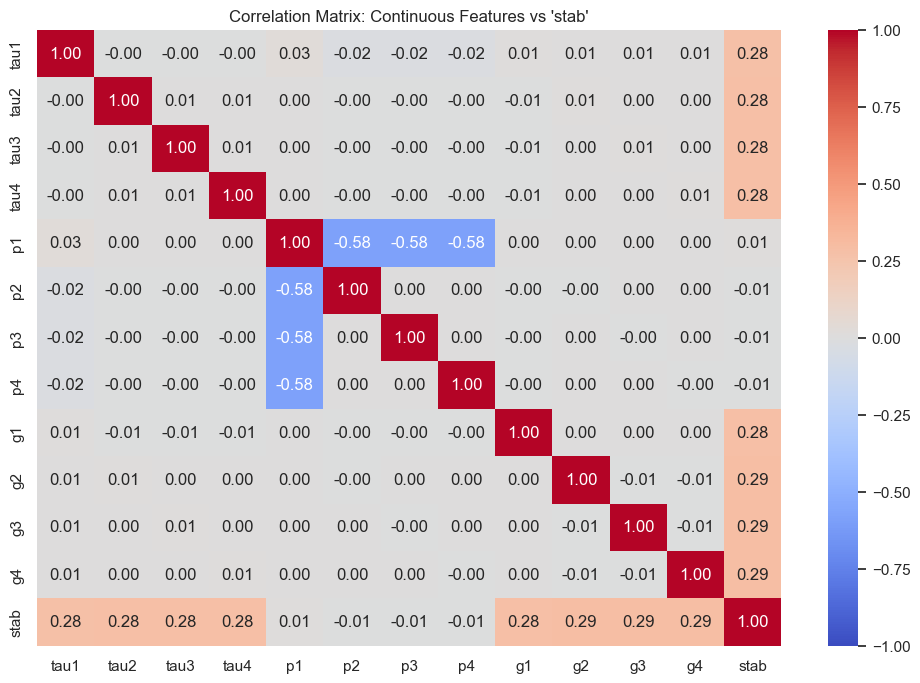

In [7]:
# Correlation Matrix for continuous variables and target 'stab'
continuous_features = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']
corr_matrix = df[continuous_features + ['stab']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', cbar=True, vmin=-1, vmax=1)
plt.title("Correlation Matrix: Continuous Features vs 'stab'")
plt.show()


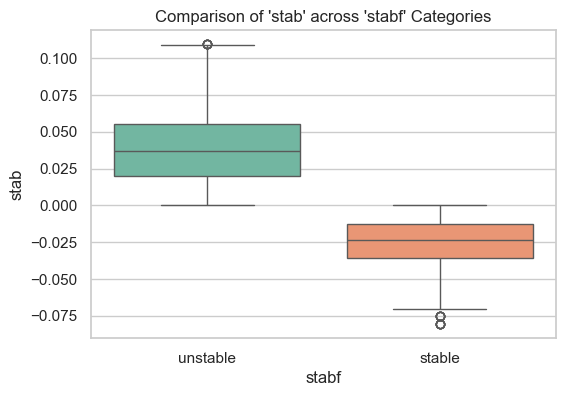

            count      mean       std           min       25%       50%  \
stabf                                                                     
stable    21720.0 -0.024798  0.014768 -8.075989e-02 -0.035918 -0.023713   
unstable  38280.0  0.038727  0.023486  2.574273e-07  0.019639  0.036620   

               75%       max  
stabf                         
stable   -0.012568 -0.000002  
unstable  0.055492  0.109403  


In [8]:
# Box plot comparing 'stab' for each category in 'stabf'
plt.figure(figsize=(6, 4))
sns.boxplot(x='stabf', y='stab', data=df,hue='stabf', palette='Set2',legend=False)
plt.title("Comparison of 'stab' across 'stabf' Categories")
plt.show()

# Summary statistics for 'stab' grouped by 'stabf'
stab_stats = df.groupby('stabf')['stab'].describe()
print(stab_stats)


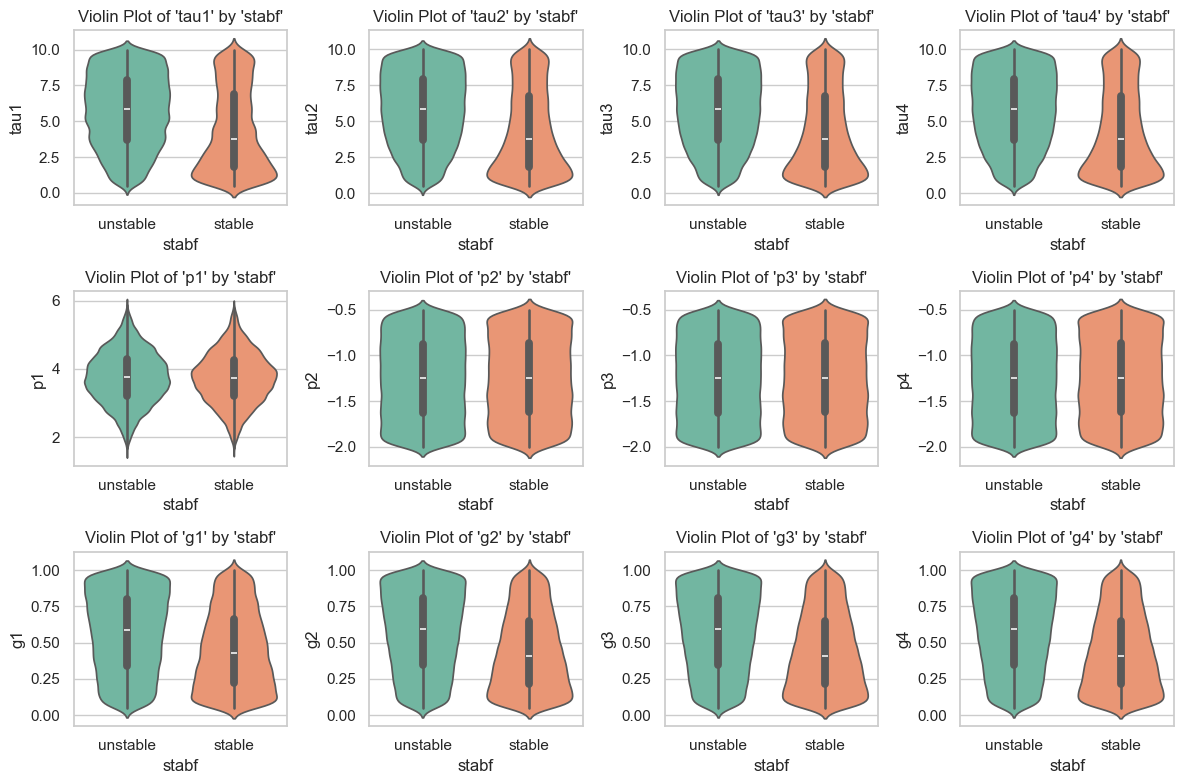

In [9]:
# Violin plots for continuous features vs 'stabf'
plt.figure(figsize=(12, 8))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 4, i)
    sns.violinplot(x='stabf', y=feature, data=df, hue='stabf', palette='Set2', legend=False)
    plt.title(f"Violin Plot of '{feature}' by 'stabf'")
plt.tight_layout()
plt.show()


# **Modeling and Predicting Grid Stability**

To analyze grid stability, researchers have developed models such as the Decentralized Smart Grid Control (DSGC) system. This differential equation-based approach leverages parameters such as power balance, reaction times of grid participants, and price elasticity to determine whether a system is stable or unstable. However, these mathematical models often rely on simplifying assumptions, which may limit their practical applicability.

An alternative approach involves leveraging machine learning to predict grid stability. By generating a synthetic dataset from simulations of a reference 4-node star grid architecture, researchers have trained learning models to classify grid states as "stable" or "unstable." These simulations provide a robust dataset for training, consisting of key features such as reaction times, power generation and consumption, and price elasticity coefficients for each node in the grid. The dataset enables machine learning models to generalize and predict stability outcomes without relying on restrictive assumptions.



In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Scaling the features
scaler = StandardScaler()
scaled_features = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']
df[scaled_features] = scaler.fit_transform(df[scaled_features])

# 2. Encoding the target variable 'stabf' (binary)
df['stabf'] = df['stabf'].map({'stable': 1, 'unstable': 0})


# 3. Prepare features (X) and targets (y)
X = df.drop(columns=['stab', 'stabf'])
y_regression = df['stab']  # For regression (stab)
y_classification = df['stabf']  # For classification (stabf)

# 4. Split the dataset into training and testing sets
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.1, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.1, random_state=42)

print(f"Training set for regression: {X_train.shape}")
print(f"Test set for regression: {X_test.shape}")
print(f"Training set for classification: {X_train_class.shape}")
print(f"Test set for classification: {X_test_class.shape}")


Training set for regression: (54000, 12)
Test set for regression: (6000, 12)
Training set for classification: (54000, 12)
Test set for classification: (6000, 12)


In [12]:
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Regression Model - CatBoost Regressor
catboost_regressor = CatBoostRegressor(iterations=1000, depth=10, learning_rate=0.03, random_seed=42, verbose=0)
catboost_regressor.fit(X_train, y_train_reg)

# Predict on test data
y_pred_reg_catboost = catboost_regressor.predict(X_test)

# Evaluate the regression model
mse_catboost = mean_squared_error(y_test_reg, y_pred_reg_catboost)
r2_catboost = r2_score(y_test_reg, y_pred_reg_catboost)

# 2. Classification Model - CatBoost Classifier
catboost_classifier = CatBoostClassifier(iterations=1000, depth=10, learning_rate=0.03, random_seed=42, verbose=0)
catboost_classifier.fit(X_train_class, y_train_class)

# Predict on test data
y_pred_class_catboost = catboost_classifier.predict(X_test_class)

# Evaluate the classification model
accuracy_catboost = accuracy_score(y_test_class, y_pred_class_catboost)
precision_catboost = precision_score(y_test_class, y_pred_class_catboost)
recall_catboost = recall_score(y_test_class, y_pred_class_catboost)
f1_catboost = f1_score(y_test_class, y_pred_class_catboost)
roc_auc_catboost = roc_auc_score(y_test_class, y_pred_class_catboost)

# Print Evaluation Results
print(f"Regression Model (CatBoost) Evaluation:")
print(f"Mean Squared Error: {mse_catboost}")
print(f"R-squared: {r2_catboost}")

print(f"\nClassification Model (CatBoost) Evaluation:")
print(f"Accuracy: {accuracy_catboost}")
print(f"Precision: {precision_catboost}")
print(f"Recall: {recall_catboost}")
print(f"F1 Score: {f1_catboost}")
print(f"AUC-ROC: {roc_auc_catboost}")


Regression Model (CatBoost) Evaluation:
Mean Squared Error: 2.1128906363269703e-05
R-squared: 0.9840779994534691

Classification Model (CatBoost) Evaluation:
Accuracy: 0.9896666666666667
Precision: 0.9905970850963799
Recall: 0.9804560260586319
F1 Score: 0.9855004677268475
AUC-ROC: 0.9876312849067505


***Objectives of This Study***

The primary aim of this study is to advance grid stability predictions by applying a cutting-edge machine learning technique: the CatBoost algorithm. CatBoost, a gradient-boosting framework optimized for categorical and numerical data, offers the flexibility to perform both classification and regression tasks. Specifically, the goals are:

Binary Classification: To predict whether the grid is *"stable"* or *"unstable"* based on the dataset's predictive features. This will utilize the stabf categorical label.

Regression Analysis: To predict the precise stability score *(stab)* to gain a deeper understanding of the stability dynamics.
By utilizing the synthetic "Electrical Grid Stability Simulated Dataset," this study focuses on building high-performing predictive models that can contribute to smarter and more resilient grid management systems. 

The dataset, enriched by augmentation techniques, allows for a diverse exploration of grid behavior under varying scenarios. SInce there are no missing values and all features being numerical, this dataset provides an ideal starting point for deploying machine learning models.


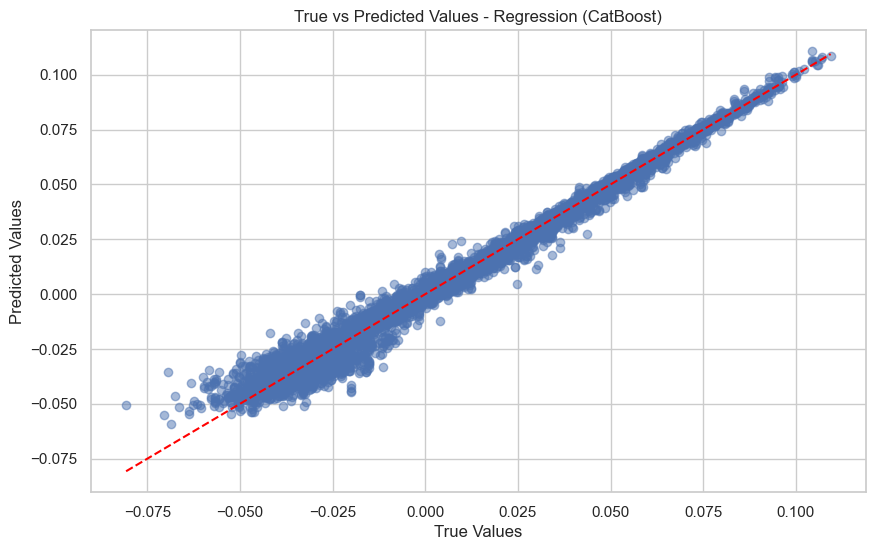

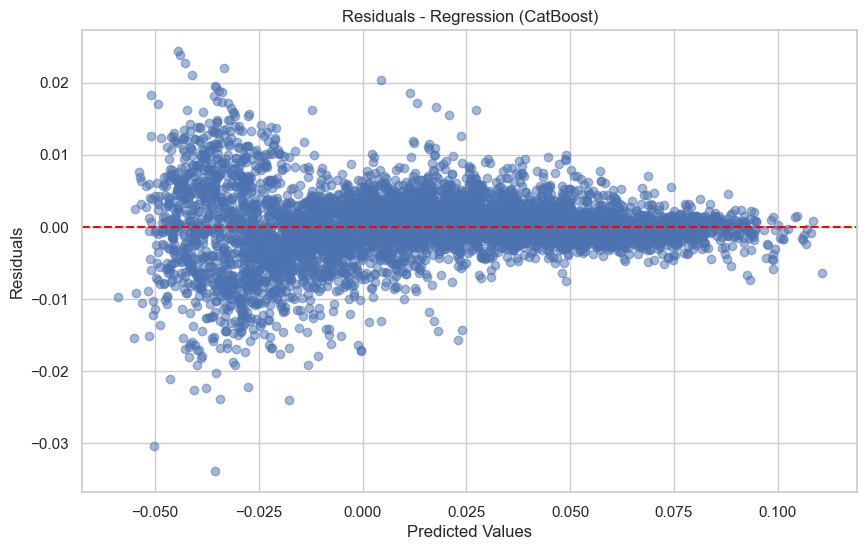

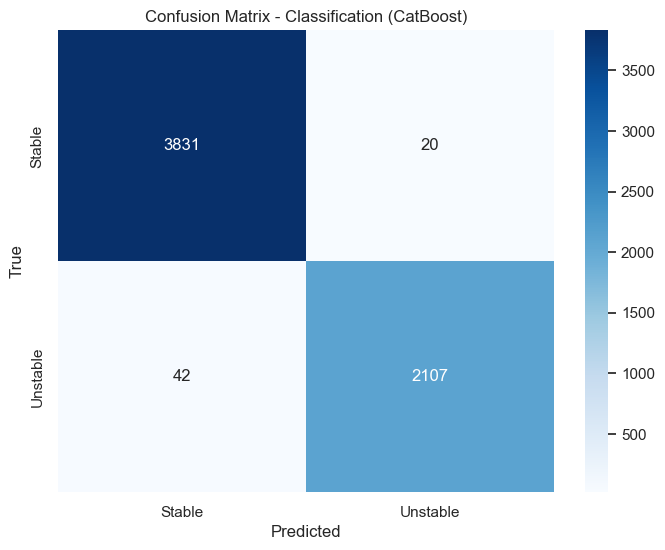

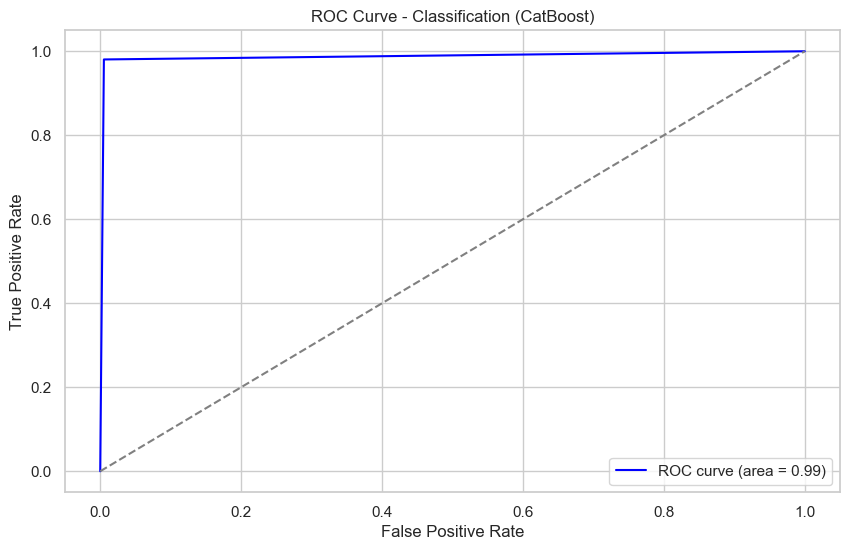

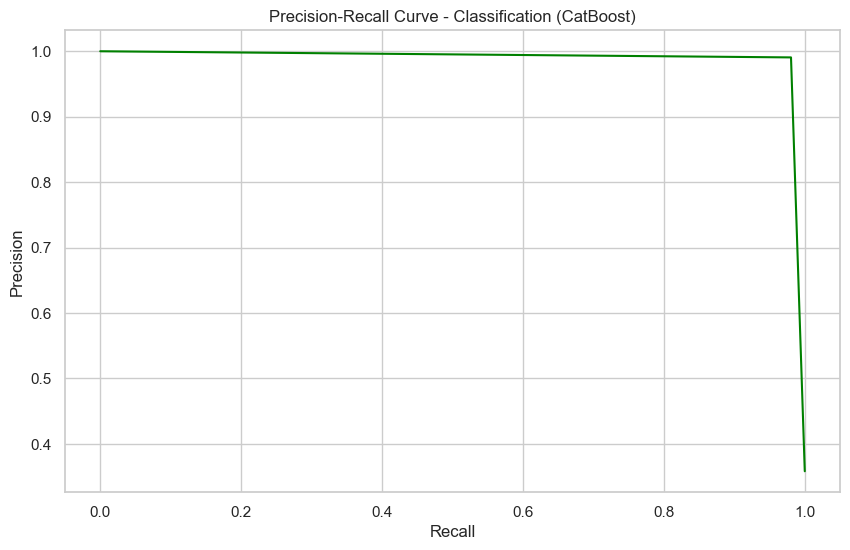

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# 1. Regression Model - True vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg_catboost, alpha=0.5)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.title("True vs Predicted Values - Regression (CatBoost)")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# 2. Regression Model - Residual Plot
residuals = y_test_reg - y_pred_reg_catboost
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_reg_catboost, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals - Regression (CatBoost)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 3. Classification Model - Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class_catboost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stable", "Unstable"], yticklabels=["Stable", "Unstable"])
plt.title("Confusion Matrix - Classification (CatBoost)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 4. Classification Model - ROC Curve
fpr, tpr, _ = roc_curve(y_test_class, y_pred_class_catboost)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve - Classification (CatBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# 5. Classification Model - Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_class, y_pred_class_catboost)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green')
plt.title("Precision-Recall Curve - Classification (CatBoost)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


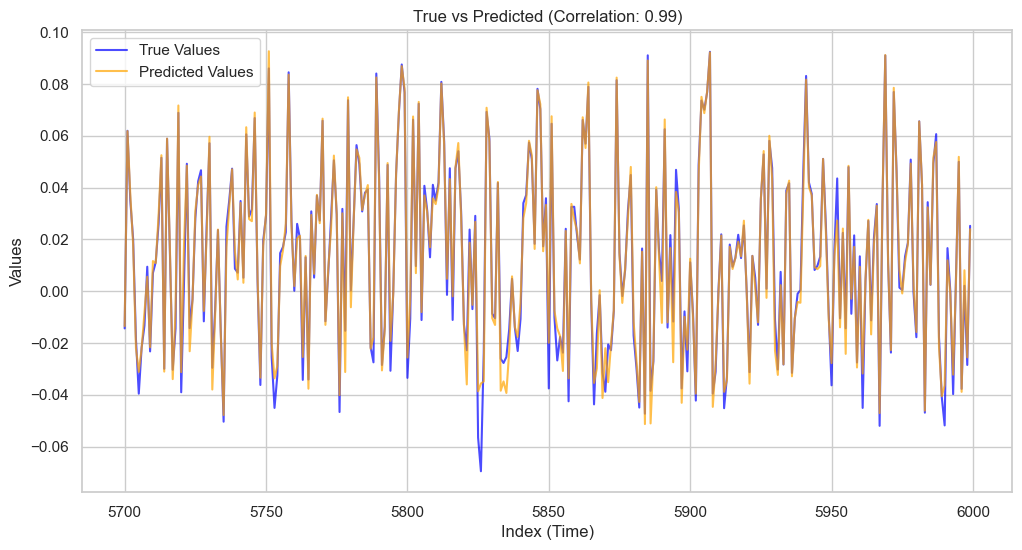

In [14]:
# Slice to get the last 300 values
time_index = np.arange(len(y_test_reg) - 300, len(y_test_reg))  # Last 300 indices
y_test_reg_last_300 = y_test_reg[-300:]  # Last 300 true values
y_pred_reg_catboost_last_300 = y_pred_reg_catboost[-300:]  # Last 300 predicted values

# Calculate correlation for the last 300 values
correlation = np.corrcoef(y_test_reg_last_300, y_pred_reg_catboost_last_300)[0, 1]

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(time_index, y_test_reg_last_300, label="True Values", color='blue', alpha=0.7)
plt.plot(time_index, y_pred_reg_catboost_last_300, label="Predicted Values", color='orange', alpha=0.7)
plt.title(f"True vs Predicted (Correlation: {correlation:.2f})")
plt.xlabel("Index (Time)")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()
